    Main

Libraries

In [258]:
import numpy as np
import matplotlib.pyplot as plt

Set Seed for Reproducibility

In [259]:
# reproducibility
seed = 42
rng = np.random.default_rng(seed)

# PART 1

Set Users(N) and Resource Blocks(K)

In [260]:
N = 10
K = 50

Randomly create C matrix

CQI values range 0-15

In [261]:
C = rng.integers(low=0, high=16, size=(N, K))

# include diff fading and diff avg quality
# avg_quality = rng.uniform(-5, 25, size=N)[:, None]
# fading = rng.normal(0, 2, size=(N, K))
# C_dB = avg_quality + fading


Max C/I  Algorithm (greedy ανά RB)
Find for each Resource Block the User with best Quality ( max C value)

In [262]:
assignment = np.argmax(C, axis=0)

for k, user in enumerate(assignment):
    print(f"RB {k}: assigned to user {user}")

RB 0: assigned to user 8
RB 1: assigned to user 4
RB 2: assigned to user 3
RB 3: assigned to user 8
RB 4: assigned to user 7
RB 5: assigned to user 7
RB 6: assigned to user 2
RB 7: assigned to user 4
RB 8: assigned to user 8
RB 9: assigned to user 3
RB 10: assigned to user 3
RB 11: assigned to user 0
RB 12: assigned to user 4
RB 13: assigned to user 1
RB 14: assigned to user 5
RB 15: assigned to user 9
RB 16: assigned to user 8
RB 17: assigned to user 6
RB 18: assigned to user 6
RB 19: assigned to user 4
RB 20: assigned to user 8
RB 21: assigned to user 9
RB 22: assigned to user 3
RB 23: assigned to user 5
RB 24: assigned to user 6
RB 25: assigned to user 9
RB 26: assigned to user 8
RB 27: assigned to user 0
RB 28: assigned to user 3
RB 29: assigned to user 8
RB 30: assigned to user 1
RB 31: assigned to user 7
RB 32: assigned to user 7
RB 33: assigned to user 1
RB 34: assigned to user 0
RB 35: assigned to user 5
RB 36: assigned to user 6
RB 37: assigned to user 8
RB 38: assigned to use

Calculate Rate for each resource block using the channel quality value of the assigned user.

Rate proportional to C, rate = a * C. Using a = 1.

Rate per rb in Mbps
Data Rate achievable on RB :
R = Bandwidth of RB * Spectral efficiency
Rate per RB =HX * Spectral efficiency
3GPP Array CQI -> Spectral Efficiency

Rates->achievable rates for each user in each rb

Rates_per_rb -> rates achieved on RB by assigned user

In [263]:
CQI_to_eff = np.array([
    0.00, 0.1523, 0.2344, 0.3770, 0.6016, 0.8770,
    1.1758, 1.4766, 1.9141, 2.4063, 2.7305,
    3.3223, 3.9023, 4.5234, 5.1152, 5.5547
])

B_RB = 180e3  # Hz

rates = B_RB * CQI_to_eff[C] / 1e6  # Mbps

# rates_per_rb = C[assignment, np.arange(K)]
rates_per_rb = rates[assignment, np.arange(K)]

for k in range(K):
    print(f"RB {k}: rate = {rates_per_rb[k]:.2f}")

RB 0: rate = 1.00
RB 1: rate = 0.92
RB 2: rate = 0.92
RB 3: rate = 1.00
RB 4: rate = 1.00
RB 5: rate = 1.00
RB 6: rate = 0.70
RB 7: rate = 1.00
RB 8: rate = 0.92
RB 9: rate = 0.70
RB 10: rate = 1.00
RB 11: rate = 1.00
RB 12: rate = 0.70
RB 13: rate = 1.00
RB 14: rate = 1.00
RB 15: rate = 1.00
RB 16: rate = 1.00
RB 17: rate = 0.60
RB 18: rate = 1.00
RB 19: rate = 0.92
RB 20: rate = 0.92
RB 21: rate = 0.70
RB 22: rate = 0.70
RB 23: rate = 1.00
RB 24: rate = 1.00
RB 25: rate = 0.70
RB 26: rate = 0.81
RB 27: rate = 0.81
RB 28: rate = 0.92
RB 29: rate = 0.60
RB 30: rate = 1.00
RB 31: rate = 0.92
RB 32: rate = 1.00
RB 33: rate = 0.81
RB 34: rate = 0.92
RB 35: rate = 1.00
RB 36: rate = 1.00
RB 37: rate = 0.92
RB 38: rate = 0.92
RB 39: rate = 1.00
RB 40: rate = 1.00
RB 41: rate = 0.81
RB 42: rate = 1.00
RB 43: rate = 0.49
RB 44: rate = 1.00
RB 45: rate = 1.00
RB 46: rate = 1.00
RB 47: rate = 1.00
RB 48: rate = 0.92
RB 49: rate = 1.00


Total Rate

In [264]:
total_rate = np.sum(rates_per_rb)

Total Rate per User

In [265]:
total_rate_per_user = np.zeros(N)

for k, user in enumerate(assignment):
    total_rate_per_user[user] += rates_per_rb[k]

for user in range(N):
    print(f"User {user}: total rate = {total_rate_per_user[user]:.2f}")

User 0: total rate = 3.73
User 1: total rate = 2.81
User 2: total rate = 2.70
User 3: total rate = 5.25
User 4: total rate = 4.04
User 5: total rate = 4.00
User 6: total rate = 5.60
User 7: total rate = 4.84
User 8: total rate = 8.17
User 9: total rate = 4.14


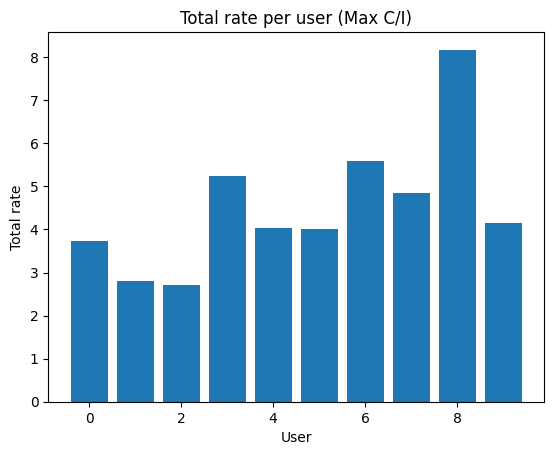

In [266]:
import matplotlib.pyplot as plt

plt.bar(range(N), total_rate_per_user)
plt.xlabel("User")
plt.ylabel("Total rate")
plt.title("Total rate per user (Max C/I)")
plt.show()

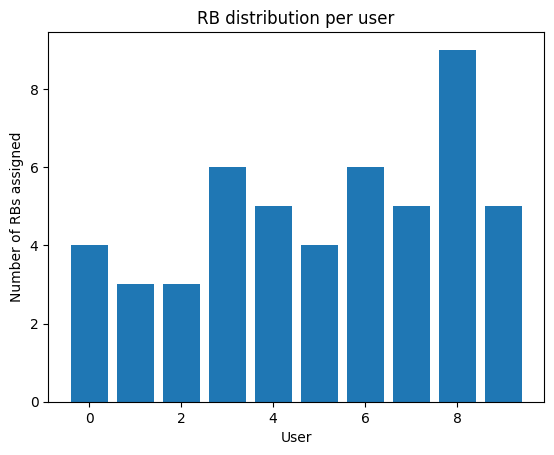

In [267]:
rb_count_per_user = np.zeros(N, dtype=int)
for u in assignment:
    rb_count_per_user[u] += 1

plt.bar(range(N), rb_count_per_user)
plt.xlabel("User")
plt.ylabel("Number of RBs assigned")
plt.title("RB distribution per user")
plt.show()

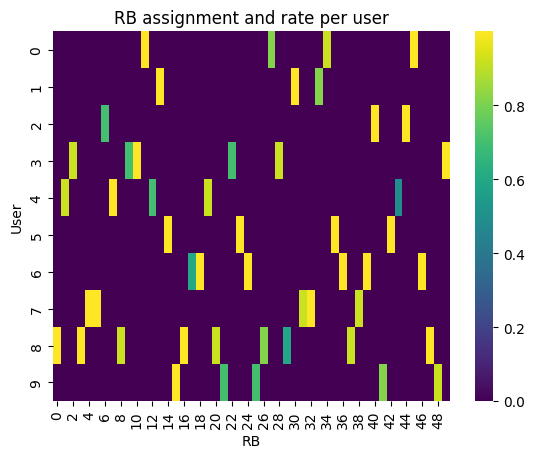

In [268]:
import seaborn as sns

# Create matrix for visualization: rows=users, columns=RBs, 0 if not assigned
visual = np.zeros((N, K))
for k, user in enumerate(assignment):
    visual[user, k] = rates_per_rb[k]

sns.heatmap(visual, annot=False, cmap="viridis")
plt.xlabel("RB")
plt.ylabel("User")
plt.title("RB assignment and rate per user")
plt.show()


# PART 2

Initialisation of T, queues and avg_rate_per_user

In [269]:
T = 1000
queues = np.zeros(N)
avg_rate_per_user = np.zeros(N)

queues_history = np.zeros((T, N))
throughput_history = np.zeros((T, N))
jfi_history = np.zeros(T)

Random C matrix every TTI (timestep)
Random requested data rate Q matrix every TTI (timestep)

In [270]:
rng = np.random.default_rng()

for t in range(T):
    # Channel quality C[t, i, k] ~ positive, e.g., Rayleigh-like
    C = rng.random((N, K))

    # Requested rate Q[t, i] ~ Normal(mean_i, std)
    Q_mean = rng.uniform(0.5, 1.5, size=N)  #per user
    Q = rng.normal(loc=Q_mean, scale=0.1, size=N)
    Q = np.maximum(Q, 0)  # αρνητικά rates δεν έχουν νόημα


Max C/I

In [271]:
    assignment = np.argmax(C, axis=0)
    rates_per_rb = C[assignment, np.arange(K)]

Update Queue

queue = previous queue + request - served

In [272]:
    queues += Q
    for k, user in enumerate(assignment):
        queues[user] = max(queues[user] - rates_per_rb[k], 0)

Throughput update for every TTI

In [273]:
    instant_throughput = np.zeros(N)
    for k, user in enumerate(assignment):
        instant_throughput[user] += rates_per_rb[k]

    # Mean throughput
    avg_rate_per_user = (avg_rate_per_user*t + instant_throughput) / (t+1)

     Jain's fairness index

1->Perfectly fair. All users same amount of resources

0-> Completely unfair. All resources allocated to a single user.

In [274]:
    JFI = (np.sum(instant_throughput)**2) / (N * np.sum(instant_throughput**2))

Save history for plotting

In [275]:
    queues_history[t] = queues
    throughput_history[t] = instant_throughput
    jfi_history[t] = JFI

    Plots

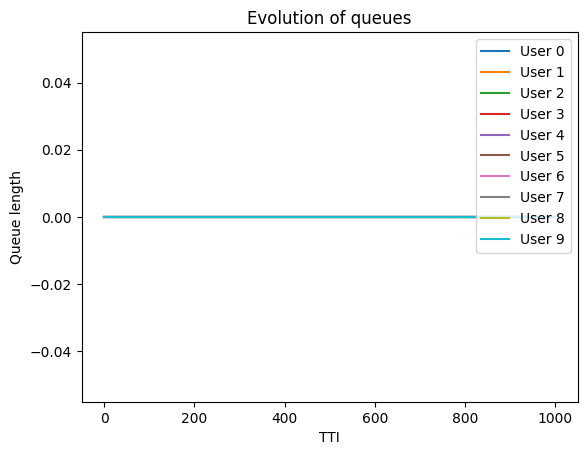

In [276]:
plt.figure()
for i in range(N):
    plt.plot(range(T), queues_history[:,i], label=f'User {i}')
plt.xlabel("TTI")
plt.ylabel("Queue length")
plt.title("Evolution of queues")
plt.legend()
plt.show()

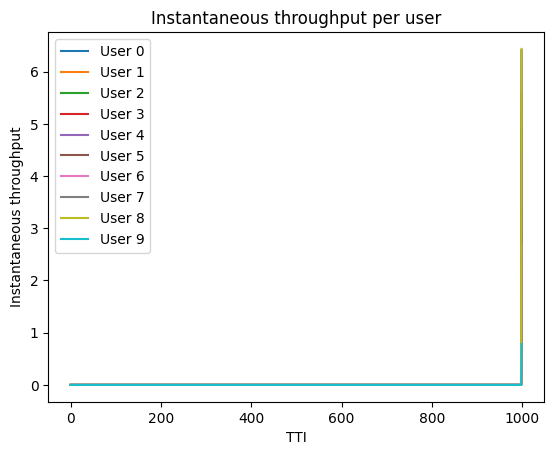

In [277]:
plt.figure()
for i in range(N):
    plt.plot(range(T), throughput_history[:,i], label=f'User {i}')
plt.xlabel("TTI")
plt.ylabel("Instantaneous throughput")
plt.title("Instantaneous throughput per user")
plt.legend()
plt.show()

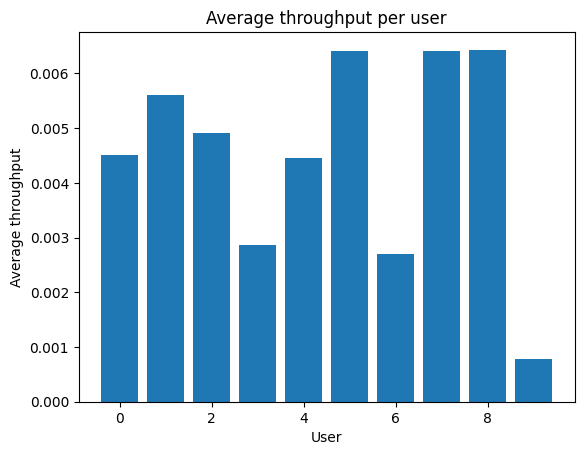

In [278]:
plt.figure()
plt.bar(range(N), avg_rate_per_user)
plt.xlabel("User")
plt.ylabel("Average throughput")
plt.title("Average throughput per user")
plt.show()

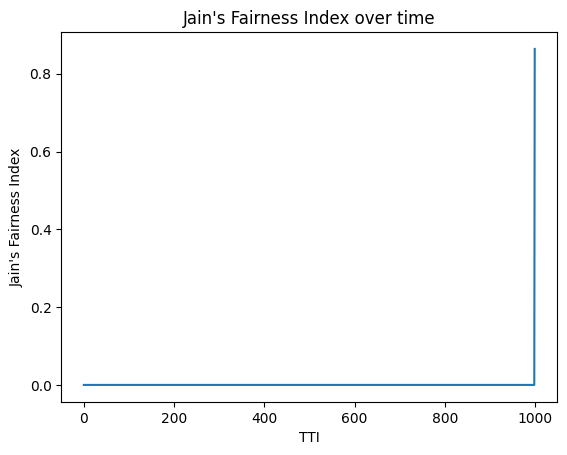

In [279]:
plt.figure()
plt.plot(range(T), jfi_history)
plt.xlabel("TTI")
plt.ylabel("Jain's Fairness Index")
plt.title("Jain's Fairness Index over time")
plt.show()